# Titanic: Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('gender_submission.csv')
print(len(train),len(test),len(submit))

891 418 418


#### Check for null data

In [3]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# can drop 2 nans in the embarked column
train = train[train['Embarked'].isna()!=True]

In [5]:
print(len(train),len(test))

889 418


In [6]:
train[train['Age'].isna()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


TODO:<br>
1) Only first class passengers can have a cabin, so cabin feature is not useful.
    However, the cabin letters could indicate what floor level each passenger is at. Cabin A is at the top, so it is closest to the deck where the lifeboats are. As a result, it could be useful to use Cabin letters. <br>

### Feature engineering and Feature Selection

In [7]:
train.columns
# TODO: combine train and test to simplify code

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# transform cabin column into holding only cabin floor
train.loc[train['Cabin'].isna()==True,'Cabin'] = 'Z'
test.loc[test['Cabin'].isna()==True,'Cabin'] = 'Z'
def split(word):
    return [char for char in word]

In [9]:
train['Cabin'] = [split(i) for i in train['Cabin']]
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Z']
a = []
for i in train['Cabin']:
    b = []
    for j in i:
        if j in cabin_list:
            b.append(j)
    a.append(b)
train['Cabin'] = a
# select the highest deck for passengers with multiple decks booked
train['Cabin'] = [min(i) for i in train['Cabin']]

test['Cabin'] = [split(i) for i in test['Cabin']]
a = []
for i in test['Cabin']:
    b = []
    for j in i:
        if j in cabin_list:
            b.append(j)
    a.append(b)
test['Cabin'] = a
test['Cabin'] = [min(i) for i in test['Cabin']]

In [10]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [11]:
train[(train['Parch']==0) & (train['Age'].isna()==True)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Z,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,Z,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,Z,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,Z,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Z,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C,C
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,Z,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,Z,S


Most of the nan values for age can be solved using Parch

In [12]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

#### "Some children travelled only with a nanny, therefore parch=0 for them" source kaggle variable notes

In [13]:
# Add column age range 
train['AgeRange'] = None
train.loc[train['Age']<13,'AgeRange'] = 'Child'
train.loc[(train['Age']>=13)&(train['Age']<21),'AgeRange'] = 'Teen'
train.loc[train['Age']>=21,'AgeRange'] = 'Adult'
train.loc[(train['Parch']==0)&(train['Age'].isna()==True),'AgeRange'] = 'Child'
train.loc[train['AgeRange'].isna()==True,'AgeRange'] = 'Teen_Adult'
# drop Age column
#train = train.drop(['Age'], axis=1) 
test['AgeRange'] = None
test.loc[test['Age']<13,'AgeRange'] = 'Child'
test.loc[(test['Age']>=13)&(test['Age']<21),'AgeRange'] = 'Teen'
test.loc[test['Age']>=21,'AgeRange'] = 'Adult'
test.loc[(test['Parch']==0)&(test['Age'].isna()==True),'AgeRange'] = 'Child'
test.loc[test['AgeRange'].isna()==True,'AgeRange'] = 'Teen_Adult'

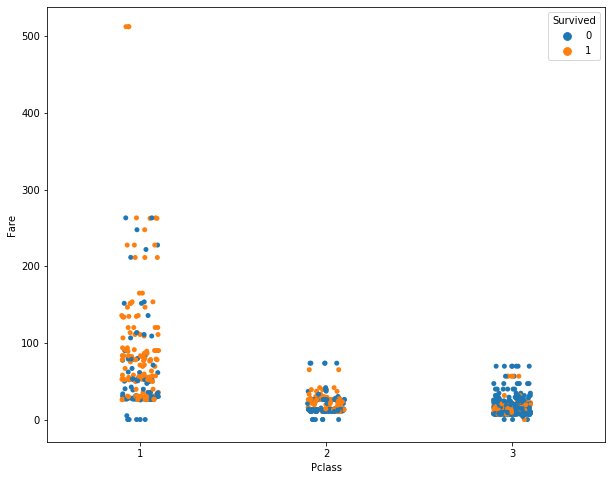

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
# check relation between fare price and Pclass
plt.figure(figsize=(10, 8))
sns.stripplot(x='Pclass',y='Fare',hue='Survived',data=train)
plt.show()

#### Observations:
1) Fare price does not relate to the ticket class unless fare is above 100 <br>
2) For fare above 100, 1st class has more % of survivers than that of 1st class tickets below 100 <br> 
2) 1st and 2nd class ticket holders have more survivers than 3rd class <br>

In [15]:
print(train.groupby('Survived')['Cabin'].value_counts().unstack().fillna(0))

Cabin       A     B     C     D     E    F    G    T      Z
Survived                                                   
0         8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1         7.0  33.0  35.0  25.0  25.0  7.0  2.0  0.0  206.0


It was expected that as Cabin number would increase from A to T the number of survived would decrease as lower letter Cabins are closer to the the deck (where life boats are). 

In [16]:
print(round(train.groupby('Cabin')['Fare'].mean()))
print(round(train.groupby('Cabin')['Fare'].median()))

Cabin
A     40.0
B    115.0
C    100.0
D     57.0
E     45.0
F     18.0
G     14.0
T     36.0
Z     19.0
Name: Fare, dtype: float64
Cabin
A    36.0
B    79.0
C    83.0
D    53.0
E    38.0
F    12.0
G    14.0
T    36.0
Z    10.0
Name: Fare, dtype: float64


Note: Cabin Z is 2nd and 3rd class <br>
#### Observations:
1) looking at the mean and median fare for each cabin, and comparing it to the Survived count table, Cabin B,C and D are most expensive cabins and they also have the highest Survival rate. <br>
2) Since fare value is significant to 5 decimal places using it will make the model too complex. To simplify model building, either use a similified version of fare value or use cabin column and fare column to create a new feature.

In [17]:
# add feature avg price of a cabin (calculated as int)
avg = round(train.groupby('Cabin')['Fare'].mean())
avg = {j:i for i,j in zip(avg,train['Cabin'].unique())}
train['Fare_avg'] = [avg[i] for i in train['Cabin']]

avg = round(test.groupby('Cabin')['Fare'].mean())
avg = {j:i for i,j in zip(avg,test['Cabin'].unique())}
test['Fare_avg'] = [avg[i] for i in test['Cabin']]

### one hot encoding

In [18]:
# one hot encoding for Sex
dummies = pd.get_dummies(train.Sex)
for i in train['Sex'].unique():
    train[i] = 0
for i in train['Sex'].unique():
    train.loc[:,i] =  dummies[i]
#train = train.drop(['Sex'], axis=1) 
train.head()
dummies = pd.get_dummies(test.Sex)
for i in test['Sex'].unique():
    test[i] = 0
for i in test['Sex'].unique():
    test.loc[:,i] =  dummies[i]

#test = test.drop(['Sex'], axis=1) 

In [19]:
# one hot encoding for age
dummies = pd.get_dummies(train.AgeRange)
for i in train['AgeRange'].unique():
    train[i] = 0
for i in train['AgeRange'].unique():
    train.loc[:,i] =  dummies[i]
    
dummies = pd.get_dummies(test.AgeRange)
for i in test['AgeRange'].unique():
    test[i] = 0

for i in test['AgeRange'].unique():
    test.loc[:,i] =  dummies[i]

## Model

In [20]:
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
#import graphviz
from sklearn.metrics import confusion_matrix

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange', 'Fare_avg',
       'male', 'female', 'Adult', 'Child', 'Teen', 'Teen_Adult'],
      dtype='object')

In [22]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange', 'Fare_avg', 'male',
       'female', 'Adult', 'Teen', 'Child', 'Teen_Adult'],
      dtype='object')

### Since this is a classification problem we can use D-Trees or random forest if this does not increase the acuracy from the baseline score then we can try other classification models

In [23]:
clf = tree.DecisionTreeClassifier()
features = ['Pclass','SibSp','Parch','male','female','Child','Adult','Teen','Teen_Adult']
X = train[features]
Y = train['Survived']
clf = clf.fit(X, Y)

In [24]:
# predict which passengers survived using the trained model
submit['Survived'] = clf.predict(test[features])
submit = submit[['PassengerId','Survived']]
submit.to_csv('submit_dt1.csv', index=False)

### Decision tree is a base line model with a score of 75.5% accuracy (score from kaggle)
#### To improve from base score do parameter tunning for decision tree and also make a model for random forest

In [25]:
# shuffle
train = train.sample(frac=1).reset_index(drop=True)

train_val_X = train[features]
train_val_y = train['Survived']

print(len(train), len(test))
print(len(train_val_X),len(train_val_y))

889 418
889 889


Depth:  1
Training accuracy:  78.62778330883863 %
Validation accuracy:  78.62946740303434 %
Depth:  5
Training accuracy:  83.60522448205566 %
Validation accuracy:  81.88979876848855 %
Depth:  6
Training accuracy:  84.22399216169663 %
Validation accuracy:  80.99092236399417 %
Depth:  7
Training accuracy:  84.64573555207889 %
Validation accuracy:  81.32863581540025 %
Depth:  8
Training accuracy:  84.95504037674426 %
Validation accuracy:  81.21564146511776 %
Depth:  9
Training accuracy:  85.12377724047472 %
Validation accuracy:  80.87919761315305 %
Depth:  10
Training accuracy:  85.17999652333317 %
Validation accuracy:  80.87792801371168 %
Depth:  11
Training accuracy:  85.17999652333317 %
Validation accuracy:  80.87792801371168 %
Depth:  12
Training accuracy:  85.17999652333317 %
Validation accuracy:  80.87792801371168 %
Depth:  13
Training accuracy:  85.17999652333317 %
Validation accuracy:  80.87792801371168 %
Depth:  14
Training accuracy:  85.17999652333317 %
Validation accuracy:  80.

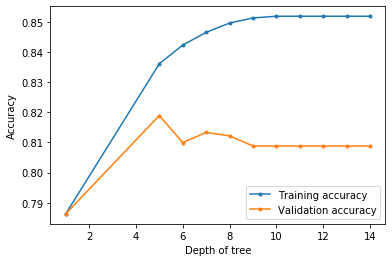

In [26]:
def dtc_parameter_tune(tain_val_X, train_val_y):
    depths = [1,5,6,7,8,9,10,11,12,13,14]
    train_acc_all = []
    val_acc_all = []

    kf = KFold(n_splits = 5)
    for depth in depths:
        train_acc = []
        val_acc = []
        for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]
            
            dtc = tree.DecisionTreeClassifier(max_depth=depth,random_state=0,
                                              criterion='entropy')
            dtc.fit(train_X, train_y)
            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))
            
        avg_train_acc = sum(train_acc) / len(train_acc) # compute the average training accuracy of K-folds CV
        avg_val_acc = sum(val_acc) / len(val_acc) # compute the average validation accuracy of K-folds CV
        print("Depth: ", depth)
        print("Training accuracy: ", avg_train_acc * 100, "%")
        print("Validation accuracy: ", avg_val_acc * 100, "%")

        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)

    return depths, train_acc_all, val_acc_all

depths, train_acc_all, val_acc_all = dtc_parameter_tune(train_val_X,train_val_y)

# plot training/validation curves
plt.plot(depths, train_acc_all, marker='.', label="Training accuracy")
plt.plot(depths, val_acc_all, marker='.', label="Validation accuracy")
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()

In [27]:
best_index = val_acc_all.index(max(val_acc_all))
best_depth = depths[best_index]
dtc = tree.DecisionTreeClassifier(max_depth=best_depth,random_state=0,
                                  criterion='entropy')
dtc.fit(train_val_X,train_val_y)
train_acc = dtc.score(train_val_X, train_val_y)

print("Best depth: ", best_depth)
print("Training accuracy: ", train_acc * 100, "%")
print("mean accuracy", np.mean(val_acc_all)* 100, "%")

Best depth:  5
Training accuracy:  83.46456692913385 %
mean accuracy 80.84757304524967 %


In [28]:
# predict which passengers survived using the trained model
submit['Survived'] = dtc.predict(test[features])
submit = submit[['PassengerId','Survived']]
submit.to_csv('submit_dt_tuned.csv', index=False)

### Decision tree with tuned parameter is 77.03% accuracy (score from kaggle) improvement of 1.5%
#### try other models to improve socore

Estimator:  1
Training accuracy:  83.52083629640164 %
Validation accuracy:  80.20059671173743 %
Estimator:  2
Training accuracy:  83.74598998087833 %
Validation accuracy:  79.41407985780486 %
Estimator:  3
Training accuracy:  84.36444159989887 %
Validation accuracy:  79.52770900780803 %
Estimator:  4
Training accuracy:  84.81447241580936 %
Validation accuracy:  80.42848981146449 %
Estimator:  5
Training accuracy:  84.98324878711739 %
Validation accuracy:  80.09141115977908 %
Estimator:  6
Training accuracy:  85.03950757755338 %
Validation accuracy:  80.54084936202628 %
Estimator:  7
Training accuracy:  85.09576636798938 %
Validation accuracy:  80.54084936202628 %
Estimator:  8
Training accuracy:  85.09576636798938 %
Validation accuracy:  80.65511331175014 %
Estimator:  9
Training accuracy:  85.09576636798938 %
Validation accuracy:  80.54275376118835 %
Estimator:  10
Training accuracy:  85.01137818233538 %
Validation accuracy:  80.54084936202628 %
Estimator:  11
Training accuracy:  85.0

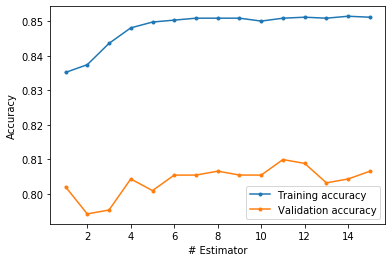

In [29]:
train = train.sample(frac=1).reset_index(drop=True)

train_val_X = train[features]
train_val_y = train['Survived']

def clf_parameter_tune(tain_val_X, train_val_y):
    n_estimators = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    train_acc_all = []
    val_acc_all = []

    kf = KFold(n_splits = 5)
    for estimator in n_estimators:
        train_acc = []
        val_acc = []
        for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]
            
            clf = RandomForestClassifier(n_estimators=estimator,random_state=0,
                                         criterion='entropy')
            clf.fit(train_X, train_y)
            train_acc.append(clf.score(train_X, train_y))
            val_acc.append(clf.score(val_X, val_y))
            
        avg_train_acc = sum(train_acc) / len(train_acc) # compute the average training accuracy of K-folds CV
        avg_val_acc = sum(val_acc) / len(val_acc) # compute the average validation accuracy of K-folds CV
        print("Estimator: ", estimator)
        print("Training accuracy: ", avg_train_acc * 100, "%")
        print("Validation accuracy: ", avg_val_acc * 100, "%")

        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)

    return n_estimators, train_acc_all, val_acc_all

n_estimators, train_acc_all, val_acc_all = clf_parameter_tune(train_val_X, train_val_y)

# plot training/validation curves
plt.plot(n_estimators, train_acc_all, marker='.', label="Training accuracy")
plt.plot(n_estimators, val_acc_all, marker='.', label="Validation accuracy")
plt.xlabel('# Estimator')
plt.ylabel('Accuracy')
plt.legend()

In [30]:
best_index = val_acc_all.index(max(val_acc_all))
best_estimator = n_estimators[best_index]
clf = RandomForestClassifier(n_estimators=best_estimator,random_state=0,
                             criterion='entropy')
clf.fit(train_val_X,train_val_y)
train_acc = clf.score(train_val_X, train_val_y)

print("Best estimator: ", best_estimator)
print("Training accuracy: ", train_acc * 100, "%")
print("mean accuracy", np.mean(val_acc_all)* 100, "%")

Best estimator:  11
Training accuracy:  84.58942632170978 %
mean accuracy 80.3835036712584 %


In [31]:
# predict which passengers survived using the trained model
submit['Survived'] = clf.predict(test[features])
submit = submit[['PassengerId','Survived']]
submit.to_csv('submit_RF_tuned.csv', index=False)

### Result of random forest was 75.6% 